In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(45)

In [3]:
df=pd.read_csv('airline-passengers.csv')
input=df.copy()

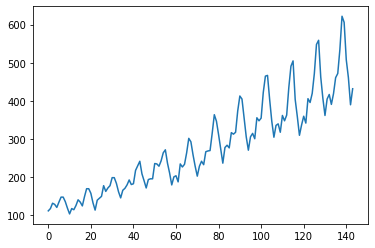

In [4]:
plt.plot(df['Passengers'])

In [5]:
df['Passengers']=df['Passengers'].astype('float32')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [7]:
scaled=scaler.fit_transform(df[['Passengers']])
scaled_df = pd.DataFrame(scaled, columns=['Passengers'])
scaled_df['Month'] = df['Month']
df = scaled_df


In [8]:
df

,Passengers,Month
0,0.015444,1949-01
1,0.027027,1949-02
2,0.054054,1949-03
3,0.048263,1949-04
4,0.032819,1949-05
...,...,...
139,0.969112,1960-08
140,0.779923,1960-09
141,0.689189,1960-10
142,0.552124,1960-11


In [9]:
# split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train=df.iloc[:train_size,:]
test=df.iloc[train_size:,:]


In [10]:
test

,Passengers,Month
96,0.407336,1957-01
97,0.380309,1957-02
98,0.486486,1957-03
99,0.471042,1957-04
100,0.484556,1957-05
101,0.613900,1957-06
102,0.696911,1957-07
103,0.700772,1957-08
104,0.579151,1957-09
105,0.469112,1957-10


In [11]:
train_size

96

In [12]:
test

,Passengers,Month
96,0.407336,1957-01
97,0.380309,1957-02
98,0.486486,1957-03
99,0.471042,1957-04
100,0.484556,1957-05
101,0.613900,1957-06
102,0.696911,1957-07
103,0.700772,1957-08
104,0.579151,1957-09
105,0.469112,1957-10


In [13]:
def createData(data,look_back=1):
    X,y=[],[]
    for i in range(len(data)-look_back-1):
        X.append(data.iloc[i,0])
        y.append(data.iloc[i+1,0])
    return np.array(X),np.array(y)

In [14]:
X_train,y_train=createData(train)
X_test, y_test=createData(test)

In [15]:
X_train

array([0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
       0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
       0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857,
       0.05984557, 0.04054055, 0.08687258, 0.12741312, 0.12741312,
       0.10424709, 0.05598456, 0.01930502, 0.06949806, 0.07915059,
       0.08880308, 0.14285713, 0.11389962, 0.13127413, 0.14285713,
       0.18339768, 0.18339768, 0.15444016, 0.11196911, 0.08108109,
       0.1196911 , 0.12934363, 0.14671814, 0.17181468, 0.14864865,
       0.15250966, 0.22007722, 0.24324325, 0.26640925, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374519, 0.17760617, 0.17760617,
       0.25482625, 0.25289574, 0.24131274, 0.26833975, 0.3088803 ,
       0.32432434, 0.25675675, 0.20656371, 0.14671814, 0.18725869,
       0.19305018, 0.16216215, 0.25289574, 0.23745173, 0.25096524,
       0.3088803 , 0.38223937, 0.36486486, 0.2992278 , 0.24131274,
       0.1911197 , 0.24131274, 0.26640925, 0.24903473, 0.31467

In [16]:
X_train=np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,1),))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [19]:
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0450
Epoch 2/100
94/94 - 0s - loss: 0.0216
Epoch 3/100
94/94 - 0s - loss: 0.0163
Epoch 4/100
94/94 - 0s - loss: 0.0145
Epoch 5/100
94/94 - 0s - loss: 0.0134
Epoch 6/100
94/94 - 0s - loss: 0.0122
Epoch 7/100
94/94 - 0s - loss: 0.0112
Epoch 8/100
94/94 - 0s - loss: 0.0102
Epoch 9/100
94/94 - 0s - loss: 0.0093
Epoch 10/100
94/94 - 0s - loss: 0.0083
Epoch 11/100
94/94 - 0s - loss: 0.0074
Epoch 12/100
94/94 - 0s - loss: 0.0066
Epoch 13/100
94/94 - 0s - loss: 0.0058
Epoch 14/100
94/94 - 0s - loss: 0.0053
Epoch 15/100
94/94 - 0s - loss: 0.0045
Epoch 16/100
94/94 - 0s - loss: 0.0040
Epoch 17/100
94/94 - 0s - loss: 0.0035
Epoch 18/100
94/94 - 0s - loss: 0.0031
Epoch 19/100
94/94 - 0s - loss: 0.0029
Epoch 20/100
94/94 - 0s - loss: 0.0026
Epoch 21/100
94/94 - 0s - loss: 0.0024
Epoch 22/100
94/94 - 0s - loss: 0.0023
Epoch 23/100
94/94 - 0s - loss: 0.0022
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [20]:
preds=model.predict(X_train)
testPreds=model.predict(X_test)

In [21]:
preds=scaler.inverse_transform(preds)
testPreds = scaler.inverse_transform(testPreds)
y_train = scaler.inverse_transform([y_train])
y_test=scaler.inverse_transform([y_test])


In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
trainScore = np.sqrt(mean_squared_error(y_train[0],preds[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], testPreds[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.73 RMSE
Test Score: 49.81 RMSE


In [49]:
preds=np.reshape(preds,(preds.shape[0],))
testPreds=np.reshape(testPreds,(testPreds.shape[0]))

In [50]:
trainPredictPlot = np.empty_like(df['Passengers'].values)
trainPredictPlot[:]=np.nan
trainPredictPlot[0:len(preds)]=preds
trainPredictPlot

array([120.761696, 125.866714, 138.0066  , 135.37935 , 128.44177 ,
       140.6474  , 152.23932 , 152.23932 , 141.53061 , 126.72343 ,
       114.05186 , 125.866714, 123.30659 , 132.7659  , 145.96826 ,
       140.6474  , 131.89789 , 153.14052 , 172.34676 , 172.34676 ,
       161.30838 , 138.88538 , 122.45659 , 145.0779  , 149.54361 ,
       154.04303 , 179.78969 , 165.88821 , 174.20155 , 179.78969 ,
       199.59288 , 199.59288 , 185.41129 , 164.96994 , 150.44086 ,
       168.64967 , 173.27364 , 181.65999 , 193.90016 , 182.5965  ,
       184.47214 , 217.76117 , 229.31642 , 240.90738 , 209.13153 ,
       192.00829 , 174.20155 , 194.8472  , 196.7434  , 196.7434  ,
       235.1088  , 234.1429  , 228.35179 , 241.87424 , 262.17883 ,
       269.90067 , 236.07489 , 211.04591 , 181.65999 , 201.49583 ,
       204.35487 , 189.17618 , 234.1429  , 226.42337 , 233.1772  ,
       262.17883 , 298.6673  , 290.07837 , 257.34695 , 228.35179 ,
       203.40126 , 228.35179 , 240.90738 , 232.21167 , 265.076

In [52]:
testPredictPlot = np.empty_like(df['Passengers'].values)
testPredictPlot[:] = np.nan
testPredictPlot[len(preds):-4] = testPreds
testPredictPlot


array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 

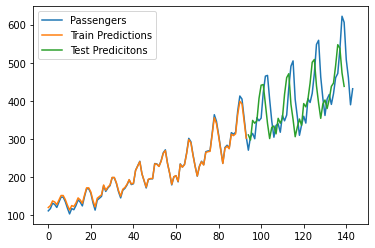

In [58]:
plt.plot(input['Passengers'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Passengers','Train Predictions','Test Predicitons'])

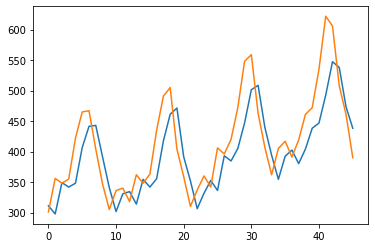

In [26]:
plt.plot(testPreds)
plt.plot(y_test[0])


array([1, 2, 1, 1, 2, 3])